In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

In [44]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [25]:
omega_index = 1 # while we debug, we confine our attention to just one value
onh2 = spectra.omegas_nu[omega_index]
onh2_str = spectra.omnu_strings[omega_index]

In [4]:
k_massless_list, z_massless_list, p_massless_list, s12_massless_list, \
    k_massive_list, z_massive_list, p_massive_list, s12_massive_list = \
    spectra.boltzmann_battery(onh2, skips=[8])

In [45]:
# It's a waste of time to consider all of the omegas and snapshots
spec_sims = spectra.better_battery(spectra.omegas_nu, spectra.omnu_strings,
    skips_omega = [0, 3], skips_model=[8], skips_snapshot=[1, 2, 3])

total Zs 5
using 0
using 1
skipping 2
skipping 3
skipping 4
total Zs 5
using 0
using 1
skipping 2
skipping 3
skipping 4
total Zs 5
using 0
using 1
skipping 2
skipping 3
skipping 4
total Zs 5
using 0
using 1
skipping 2
skipping 3
skipping 4
total Zs 5
using 0


KeyboardInterrupt: 

In [30]:
spec_sims

{'0.0006': None,
 '0.002': [[{'k': array([1.00000000e-04, 1.00011514e-04, 1.00023029e-04, ...,
           9.99769766e+00, 9.99884876e+00, 1.00000000e+01]),
    'P_no': array([7.49916101e+01, 7.49998955e+01, 7.50081819e+01, ...,
           3.98117962e-02, 3.97997978e-02, 3.97878029e-02]),
    's12_massless': array([0.34324537]),
    'P_nu': array([7.49916101e+01, 7.49998955e+01, 7.50081819e+01, ...,
           3.98117962e-02, 3.97997978e-02, 3.97878029e-02]),
    's12_massive': array([0.34324537])},
   {'k': array([1.00000000e-04, 1.00011514e-04, 1.00023029e-04, ...,
           9.99769766e+00, 9.99884876e+00, 1.00000000e+01]),
    'P_no': array([1.58984247e+02, 1.59001812e+02, 1.59019379e+02, ...,
           8.42794846e-02, 8.42540846e-02, 8.42286922e-02]),
    's12_massless': array([0.49941171]),
    'P_nu': array([1.58984247e+02, 1.59001812e+02, 1.59019379e+02, ...,
           8.42794846e-02, 8.42540846e-02, 8.42286922e-02]),
    's12_massive': array([0.49941171])},
   None,
   None,


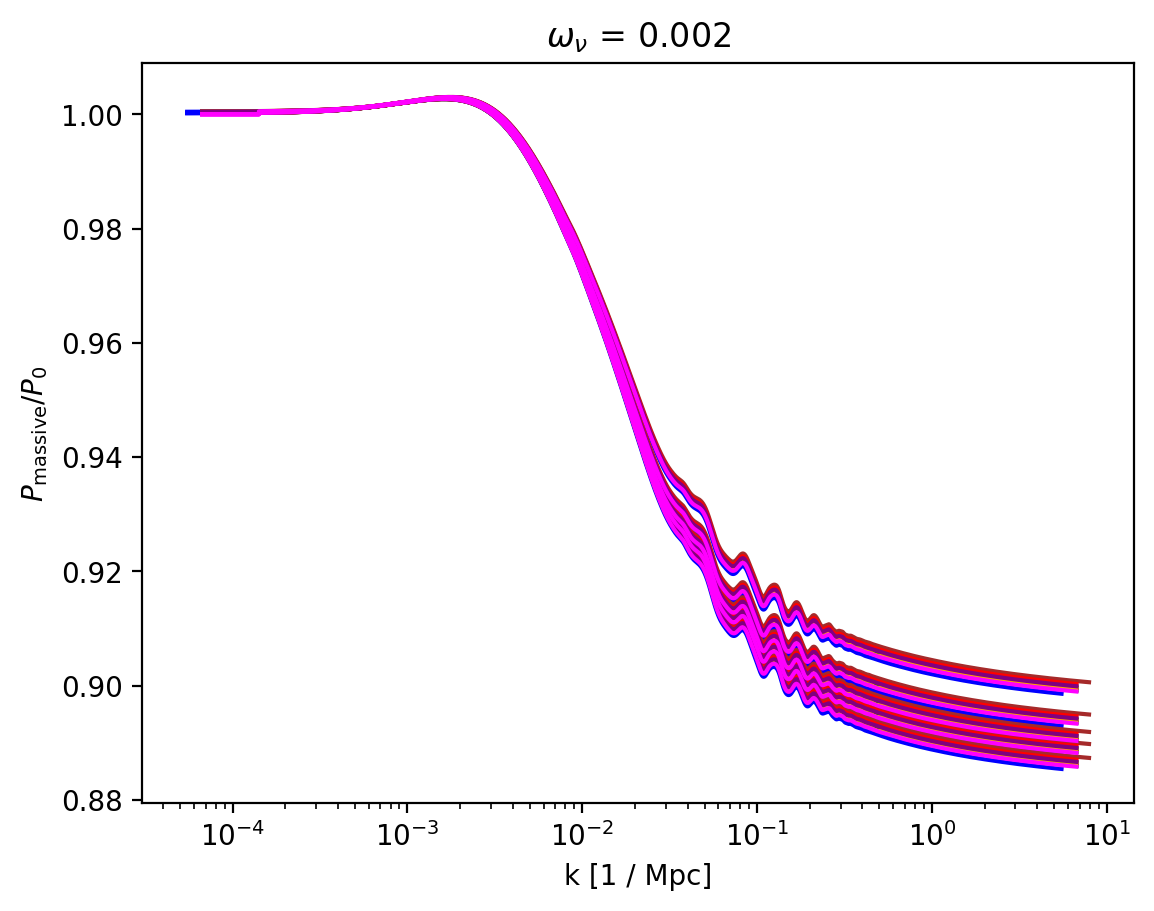

In [10]:
for i in range(len(k_massive_list)):
    h = spectra.cosm.loc[i]["h"]
    for j in range(5):
        plt.plot(k_massless_list[i] * h,
                 p_massive_list[i][j] / p_massless_list[i][j],
                 label="model " + str(i) + ", no renormalizing, z=" + \
                 str(spectra.parse_redshifts(i)[j]), c=spectra.colors[i],
                 linestyle=spectra.styles[i])
    plt.xscale('log')
    plt.xlabel(r"k [1 / Mpc]")
    plt.ylabel(r"$P_\mathrm{massive} / P_0$")
    plt.title(r"$\omega_\nu$ = " + str(onh2))

In [16]:
spec_sims

{'0.0006': None,
 '0.002': [[None,
   None,
   None,
   {'k': array([1.00000000e-04, 1.00011514e-04, 1.00023029e-04, ...,
           9.99769766e+00, 9.99884876e+00, 1.00000000e+01]),
    'P_no': array([1.58984247e+02, 1.59001812e+02, 1.59019379e+02, ...,
           8.42794846e-02, 8.42540846e-02, 8.42286922e-02]),
    's12_massless': array([0.49941171]),
    'P_nu': array([1.58984247e+02, 1.59001812e+02, 1.59019379e+02, ...,
           8.42794846e-02, 8.42540846e-02, 8.42286922e-02]),
    's12_massive': array([0.49941171])}],
  [None,
   None,
   None,
   {'k': array([1.00000000e-04, 1.00011514e-04, 1.00023029e-04, ...,
           9.99769766e+00, 9.99884876e+00, 1.00000000e+01]),
    'P_no': array([72.7926543 , 72.80069764, 72.80874186, ...,  0.0780338 ,
            0.07801043,  0.07798708]),
    's12_massless': array([0.49941055]),
    'P_nu': array([72.7926543 , 72.80069764, 72.80874186, ...,  0.0780338 ,
            0.07801043,  0.07798708]),
    's12_massive': array([0.49941055])}]

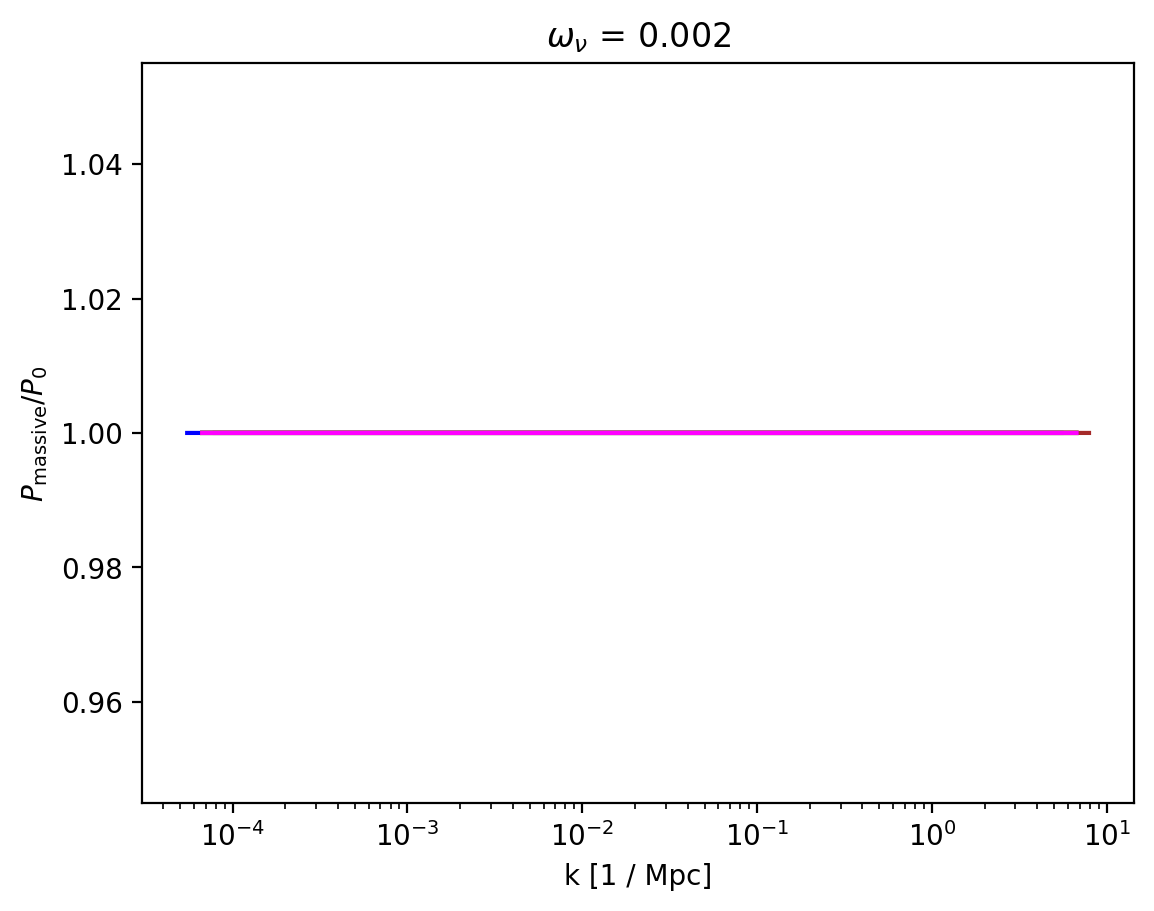

In [15]:
for i in range(len(spec_sims[onh2_str])):
    if spec_sims[onh2_str][i] is None:
        continue
    h = spectra.cosm.loc[i]["h"]
    for j in range(len(spec_sims[onh2_str][i])):
        if spec_sims[onh2_str][i][j] is None:
            continue
        plt.plot(spec_sims[onh2_str][i][j]["k"] * h,
            spec_sims[onh2_str][i][j]["P_nu"] / \
            spec_sims[onh2_str][i][j]["P_no"],
            label="model " + str(i) + ", no renormalizing, z=" + \
            str(spectra.parse_redshifts(i)[j]), c=spectra.colors[i],
            linestyle=spectra.styles[i])
    plt.xscale('log')
    plt.xlabel(r"k [1 / Mpc]")
    plt.ylabel(r"$P_\mathrm{massive} / P_0$")
    plt.title(r"$\omega_\nu$ = " + str(onh2))

In [ ]:
for i in range(0, 3):
    h = spectra.cosm.loc[i]["h"]
    j = 4 # just look at z=0 before moving on
    plt.plot(k_massless_list[i] * h,
             p_massive_list[i][j] / p_massless_list[i][j],
                 label="model " + str(i), c=spectra.colors[i])
    plt.xscale('log')
    plt.xlabel(r"k [1 / Mpc]")
    plt.ylabel(r"$P_\mathrm{massive} / P_0$")
    plt.title(r"$\omega_\nu$ = " + str(onh2) + "; $z=0$")
    plt.legend()

Currently I am not re-normalizing the amplitude of one model based on its counterpart. At least, I *think* I'm not doing that, but I'm really quite unsure

In [ ]:
#baseline = spectra.powernu2[0][0]
#baseline_max = spectra.powernu2[0][4] # why is this "max"?
baseline = spectra.powernu[onh2_str][0][0]
baseline_max = spectra.powernu[onh2_str][0][4] # why is this "max"?

In [ ]:
# Let's just look at model 0 for the initial comparisons
i = 0
# Let's just look at redshift 0 for the initial comparisons
j = 4

h = spectra.cosm.loc[i]["h"]
plt.plot(k_massless_list[i] * h, p_massive_list[i][j] / p_massless_list[i][j],
             label="my result for z=" + str(z_massive_list[i][j]),
             c=spectra.colors[i])
j = 0 # This will correspond to z=2 for the model0 case.
plt.plot(k_massless_list[i] * h, p_massive_list[i][j] / p_massless_list[i][j],
             label="my result for z="  + str(z_massive_list[i][j]), c="black")
plt.plot(baseline["k"], baseline["ratio"], label="powernu.tar snapshot 0")
plt.plot(baseline_max["k"], baseline_max["ratio"],
         label="powernu.tar snapshot 4")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_\mathrm{massive} / P_0$")
plt.title(r"$\omega_\nu$ = " + str(onh2) + "; model 0")
plt.legend()

We've now made absolutely certain that my lines here should overlap with Ariel's. What went wrong?

In [ ]:
h = spectra.cosm.loc[i]["h"]
j = 4
plt.plot(k_massless_list[i] * h, p_massless_list[i][j],
             label="my no-neut", c=spectra.colors[i])
plt.plot(k_massless_list[i] * h, p_massive_list[i][j],
             label="my neuts", c="black")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P(k)$ [?]")
plt.title(r"$\omega_\nu$ = " + str(onh2) + "; model 0")
plt.legend()